http://pandas.pydata.org/pandas-docs/stable/10min.html

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

Customarily, we import as follows:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [5]:
dates = pd.date_range('20130101', periods=6)

In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [8]:
df

,A,B,C,D
2013-01-01,-0.180839,1.345653,0.047792,-0.191681
2013-01-02,-1.561263,0.933537,0.623619,0.528618
2013-01-03,1.249229,1.087903,-0.952735,1.078028
2013-01-04,-0.079199,0.084715,0.370471,-1.356545
2013-01-05,1.776280,0.949445,0.751360,0.211362
2013-01-06,-0.465629,0.262020,-0.619080,0.337116


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [9]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [12]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [13]:
df.head()

,A,B,C,D
2013-01-01,-0.180839,1.345653,0.047792,-0.191681
2013-01-02,-1.561263,0.933537,0.623619,0.528618
2013-01-03,1.249229,1.087903,-0.952735,1.078028
2013-01-04,-0.079199,0.084715,0.370471,-1.356545
2013-01-05,1.776280,0.949445,0.751360,0.211362


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.079199,0.084715,0.370471,-1.356545
2013-01-05,1.776280,0.949445,0.751360,0.211362
2013-01-06,-0.465629,0.262020,-0.619080,0.337116


Display the index, columns, and the underlying numpy data

In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-0.18083946,  1.3456528 ,  0.04779223, -0.19168148],
       [-1.56126271,  0.93353704,  0.62361938,  0.52861795],
       [ 1.24922923,  1.08790266, -0.95273497,  1.07802794],
       [-0.07919887,  0.08471544,  0.3704707 , -1.35654503],
       [ 1.77627995,  0.94944466,  0.75136037,  0.21136173],
       [-0.46562881,  0.26201964, -0.6190801 ,  0.33711619]])

Describe shows a quick statistic summary of your data

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.123097,0.777212,0.036905,0.101150
std,1.209806,0.493706,0.689314,0.826495
min,-1.561263,0.084715,-0.952735,-1.356545
25%,-0.394431,0.429899,-0.452362,-0.090921
50%,-0.130019,0.941491,0.209131,0.274239
75%,0.917122,1.053288,0.560332,0.480743
max,1.776280,1.345653,0.751360,1.078028


Transposing your data

In [19]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.180839,-1.561263,1.249229,-0.079199,1.776280,-0.465629
B,1.345653,0.933537,1.087903,0.084715,0.949445,0.262020
C,0.047792,0.623619,-0.952735,0.370471,0.751360,-0.619080
D,-0.191681,0.528618,1.078028,-1.356545,0.211362,0.337116


Sorting by an axis

In [20]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.191681,0.047792,1.345653,-0.180839
2013-01-02,0.528618,0.623619,0.933537,-1.561263
2013-01-03,1.078028,-0.952735,1.087903,1.249229
2013-01-04,-1.356545,0.370471,0.084715,-0.079199
2013-01-05,0.211362,0.751360,0.949445,1.776280
2013-01-06,0.337116,-0.619080,0.262020,-0.465629


Sorting by value

In [21]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,-0.079199,0.084715,0.370471,-1.356545
2013-01-06,-0.465629,0.262020,-0.619080,0.337116
2013-01-02,-1.561263,0.933537,0.623619,0.528618
2013-01-05,1.776280,0.949445,0.751360,0.211362
2013-01-03,1.249229,1.087903,-0.952735,1.078028
2013-01-01,-0.180839,1.345653,0.047792,-0.191681


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [22]:
df['A']

2013-01-01   -0.180839
2013-01-02   -1.561263
2013-01-03    1.249229
2013-01-04   -0.079199
2013-01-05    1.776280
2013-01-06   -0.465629
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,-0.180839,1.345653,0.047792,-0.191681
2013-01-02,-1.561263,0.933537,0.623619,0.528618
2013-01-03,1.249229,1.087903,-0.952735,1.078028


In [24]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.561263,0.933537,0.623619,0.528618
2013-01-03,1.249229,1.087903,-0.952735,1.078028
2013-01-04,-0.079199,0.084715,0.370471,-1.356545


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [25]:
df.loc[dates[0]]

A   -0.180839
B    1.345653
C    0.047792
D   -0.191681
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [26]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.180839,1.345653
2013-01-02,-1.561263,0.933537
2013-01-03,1.249229,1.087903
2013-01-04,-0.079199,0.084715
2013-01-05,1.776280,0.949445
2013-01-06,-0.465629,0.262020


Showing label slicing, both endpoints are included

In [27]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-1.561263,0.933537
2013-01-03,1.249229,1.087903
2013-01-04,-0.079199,0.084715


Reduction in the dimensions of the returned object

In [28]:
df.loc['20130102',['A','B']]

A   -1.561263
B    0.933537
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [29]:
df.loc[dates[0],'A']

-0.18083945749997424

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [30]:
df.iloc[3]

A   -0.079199
B    0.084715
C    0.370471
D   -1.356545
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [31]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.079199,0.084715
2013-01-05,1.776280,0.949445


By lists of integer position locations, similar to the numpy/python style

In [32]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.561263,0.623619
2013-01-03,1.249229,-0.952735
2013-01-05,1.776280,0.751360


For slicing rows explicitly

In [33]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-1.561263,0.933537,0.623619,0.528618
2013-01-03,1.249229,1.087903,-0.952735,1.078028


For slicing columns explicitly

In [34]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.345653,0.047792
2013-01-02,0.933537,0.623619
2013-01-03,1.087903,-0.952735
2013-01-04,0.084715,0.370471
2013-01-05,0.949445,0.751360
2013-01-06,0.262020,-0.619080


For getting a value explicitly

In [35]:
df.iloc[1,1]

0.9335370390465398

For getting fast access to a scalar (equiv to the prior method)

In [36]:
df.iat[1,1]

0.9335370390465398

## Boolean Indexing

Using a single column’s values to select data.

In [37]:
df[df.A > 0]

,A,B,C,D
2013-01-03,1.249229,1.087903,-0.952735,1.078028
2013-01-05,1.776280,0.949445,0.751360,0.211362


A where operation for getting.

In [38]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.345653,0.047792,NaN
2013-01-02,NaN,0.933537,0.623619,0.528618
2013-01-03,1.249229,1.087903,NaN,1.078028
2013-01-04,NaN,0.084715,0.370471,NaN
2013-01-05,1.776280,0.949445,0.751360,0.211362
2013-01-06,NaN,0.262020,NaN,0.337116


Using the isin() method for filtering:

In [39]:
df2 = df.copy()

In [40]:
df2['E'] = ['one','one', 'two','three','four','three']

In [41]:
df2

,A,B,C,D,E
2013-01-01,-0.180839,1.345653,0.047792,-0.191681,one
2013-01-02,-1.561263,0.933537,0.623619,0.528618,one
2013-01-03,1.249229,1.087903,-0.952735,1.078028,two
2013-01-04,-0.079199,0.084715,0.370471,-1.356545,three
2013-01-05,1.776280,0.949445,0.751360,0.211362,four
2013-01-06,-0.465629,0.262020,-0.619080,0.337116,three


In [42]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,1.249229,1.087903,-0.952735,1.078028,two
2013-01-05,1.776280,0.949445,0.751360,0.211362,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [43]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [44]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [45]:
df['F'] = s1

Setting values by label

In [46]:
df.at[dates[0],'A'] = 0

Settomg values by position

In [47]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [48]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [49]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.047792,5,NaN
2013-01-02,-1.561263,0.933537,0.623619,5,1.0
2013-01-03,1.249229,1.087903,-0.952735,5,2.0
2013-01-04,-0.079199,0.084715,0.370471,5,3.0
2013-01-05,1.776280,0.949445,0.751360,5,4.0
2013-01-06,-0.465629,0.262020,-0.619080,5,5.0


A where operation with setting.

In [50]:
df2 = df.copy()

In [51]:
df2[df2 > 0] = -df2

In [52]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.047792,-5,NaN
2013-01-02,-1.561263,-0.933537,-0.623619,-5,-1.0
2013-01-03,-1.249229,-1.087903,-0.952735,-5,-2.0
2013-01-04,-0.079199,-0.084715,-0.370471,-5,-3.0
2013-01-05,-1.776280,-0.949445,-0.751360,-5,-4.0
2013-01-06,-0.465629,-0.262020,-0.619080,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [53]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [54]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [55]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.047792,5,NaN,1.0
2013-01-02,-1.561263,0.933537,0.623619,5,1.0,1.0
2013-01-03,1.249229,1.087903,-0.952735,5,2.0,NaN
2013-01-04,-0.079199,0.084715,0.370471,5,3.0,NaN


To drop any rows that have missing data.

In [56]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.561263,0.933537,0.623619,5,1.0,1.0


Filling missing data

In [57]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.047792,5,5.0,1.0
2013-01-02,-1.561263,0.933537,0.623619,5,1.0,1.0
2013-01-03,1.249229,1.087903,-0.952735,5,2.0,5.0
2013-01-04,-0.079199,0.084715,0.370471,5,3.0,5.0


To get the boolean mask where values are nan

In [58]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [59]:
df.mean()

A    0.153236
B    0.552937
C    0.036905
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [60]:
df.mean(1)

2013-01-01    1.261948
2013-01-02    1.199179
2013-01-03    1.676879
2013-01-04    1.675197
2013-01-05    2.495417
2013-01-06    1.835462
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [61]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [62]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [63]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.249229,0.087903,-1.952735,4.0,1.0
2013-01-04,-3.079199,-2.915285,-2.629529,2.0,0.0
2013-01-05,-3.223720,-4.050555,-4.248640,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [64]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.047792,5,NaN
2013-01-02,-1.561263,0.933537,0.671412,10,1.0
2013-01-03,-0.312033,2.021440,-0.281323,15,3.0
2013-01-04,-0.391232,2.106155,0.089147,20,6.0
2013-01-05,1.385048,3.055600,0.840508,25,10.0
2013-01-06,0.919419,3.317619,0.221428,30,15.0


In [65]:
df.apply(lambda x: x.max() - x.min())

A    3.337543
B    1.087903
C    1.704095
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [66]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [67]:
s

0    2
1    1
2    6
3    2
4    0
5    6
6    0
7    6
8    2
9    6
dtype: int32

In [68]:
s.value_counts()

6    4
2    3
0    2
1    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [69]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [70]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [71]:
df = pd.DataFrame(np.random.randn(10, 4))

In [72]:
df

,0,1,2,3
0,2.390865,-0.473015,-0.280819,-0.428463
1,-1.000700,1.025192,0.192850,1.162883
2,-0.650490,1.020526,1.013237,0.071338
3,-1.959397,-1.566152,-1.586805,0.960741
4,0.741758,0.044196,-0.267708,1.205633
5,0.252840,0.508727,0.145678,-0.142946
6,-0.136255,0.440791,-0.569330,1.747332
7,-0.435215,0.601156,-1.881152,1.259956
8,0.277121,1.484972,-0.167048,-2.305617
9,0.917896,1.194637,-1.214675,1.990305


In [73]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [74]:
pd.concat(pieces)

,0,1,2,3
0,2.390865,-0.473015,-0.280819,-0.428463
1,-1.000700,1.025192,0.192850,1.162883
2,-0.650490,1.020526,1.013237,0.071338
3,-1.959397,-1.566152,-1.586805,0.960741
4,0.741758,0.044196,-0.267708,1.205633
5,0.252840,0.508727,0.145678,-0.142946
6,-0.136255,0.440791,-0.569330,1.747332
7,-0.435215,0.601156,-1.881152,1.259956
8,0.277121,1.484972,-0.167048,-2.305617
9,0.917896,1.194637,-1.214675,1.990305


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [75]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [76]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [77]:
left

,key,lval
0,foo,1
1,foo,2


In [78]:
right

,key,rval
0,foo,4
1,foo,5


In [79]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [80]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [81]:
df

,A,B,C,D
0,0.343662,-0.495981,-1.091720,0.529092
1,0.770597,1.198525,0.077821,0.890117
2,0.128687,-1.066976,0.506167,0.066288
3,1.833659,1.634605,-0.355833,-0.135715
4,-0.361319,1.033331,0.069381,1.601500
5,-0.446590,-1.112024,-2.166419,0.312239
6,0.484956,0.286146,-0.242892,-1.876549
7,-0.002469,1.915619,1.398012,0.413284


In [82]:
s = df.iloc[3]

In [83]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.343662,-0.495981,-1.091720,0.529092
1,0.770597,1.198525,0.077821,0.890117
2,0.128687,-1.066976,0.506167,0.066288
3,1.833659,1.634605,-0.355833,-0.135715
4,-0.361319,1.033331,0.069381,1.601500
5,-0.446590,-1.112024,-2.166419,0.312239
6,0.484956,0.286146,-0.242892,-1.876549
7,-0.002469,1.915619,1.398012,0.413284
8,1.833659,1.634605,-0.355833,-0.135715


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [84]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [85]:
df

,A,B,C,D
0,foo,one,1.504340,1.224648
1,bar,one,2.054124,0.792128
2,foo,two,0.610544,0.262734
3,bar,three,1.200335,-0.033513
4,foo,two,1.180702,-0.340573
5,bar,two,-0.882434,-0.110212
6,foo,one,-2.139795,-1.326235
7,foo,three,0.804526,1.301581


Grouping and then applying a function sum to the resulting groups.

In [86]:
df.groupby('A').sum()

,C,D
A,,
bar,2.372024,0.648403
foo,1.960318,1.122154


In [87]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    2.054124  0.792128
    three  1.200335 -0.033513
    two   -0.882434 -0.110212
foo one   -0.635455 -0.101588
    three  0.804526  1.301581
    two    1.791247 -0.077839

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [88]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [89]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [90]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [91]:
df2 = df[:4]

In [92]:
df2

A         B
first second                    
bar   one    -0.778423 -0.051931
      two     0.464955  0.080888
baz   one    -0.495273 -0.001834
      two    -1.321358 -0.262511

The stack() method “compresses” a level in the DataFrame’s columns.

In [93]:
stacked = df2.stack()

In [94]:
stacked

first  second   
bar    one     A   -0.778423
               B   -0.051931
       two     A    0.464955
               B    0.080888
baz    one     A   -0.495273
               B   -0.001834
       two     A   -1.321358
               B   -0.262511
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [95]:
stacked.unstack()

A         B
first second                    
bar   one    -0.778423 -0.051931
      two     0.464955  0.080888
baz   one    -0.495273 -0.001834
      two    -1.321358 -0.262511

In [96]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.778423  0.464955
      B -0.051931  0.080888
baz   A -0.495273 -1.321358
      B -0.001834 -0.262511

In [97]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.778423 -0.495273
       B -0.051931 -0.001834
two    A  0.464955 -1.321358
       B  0.080888 -0.262511

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [98]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [99]:
df

,A,B,C,D,E
0,one,A,foo,0.166417,0.299557
1,one,B,foo,-0.240750,0.472637
2,two,C,foo,0.293432,1.530955
3,three,A,bar,-0.505890,1.243385
4,one,B,bar,-0.231911,-0.015287
5,one,C,bar,-0.886267,-0.452707
6,two,A,foo,-0.707394,-0.126561
7,three,B,foo,0.340931,0.256100
8,one,C,foo,-0.029442,1.396942
9,one,A,bar,2.195673,-1.189167


We can produce pivot tables from this data very easily:

In [100]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  2.195673  0.166417
      B -0.231911 -0.240750
      C -0.886267 -0.029442
three A -0.505890       NaN
      B       NaN  0.340931
      C -0.020476       NaN
two   A       NaN -0.707394
      B  1.423446       NaN
      C       NaN  0.293432

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [101]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [102]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [103]:
ts.resample('5Min').sum()

2012-01-01    23798
Freq: 5T, dtype: int32

Time zone representation

In [104]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [105]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [106]:
ts

2012-03-06    0.022619
2012-03-07   -0.796117
2012-03-08   -0.684793
2012-03-09    0.952850
2012-03-10   -0.662649
Freq: D, dtype: float64

In [107]:
ts_utc = ts.tz_localize('UTC')

In [108]:
ts_utc

2012-03-06 00:00:00+00:00    0.022619
2012-03-07 00:00:00+00:00   -0.796117
2012-03-08 00:00:00+00:00   -0.684793
2012-03-09 00:00:00+00:00    0.952850
2012-03-10 00:00:00+00:00   -0.662649
Freq: D, dtype: float64


Convert to another time zone

In [109]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.022619
2012-03-06 19:00:00-05:00   -0.796117
2012-03-07 19:00:00-05:00   -0.684793
2012-03-08 19:00:00-05:00    0.952850
2012-03-09 19:00:00-05:00   -0.662649
Freq: D, dtype: float64


Converting between time span representations

In [110]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [111]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [112]:
ts

2012-01-31   -0.577497
2012-02-29   -0.816409
2012-03-31    0.002634
2012-04-30   -0.095848
2012-05-31   -0.222658
Freq: M, dtype: float64

In [113]:
ps = ts.to_period()

In [114]:
ps

2012-01   -0.577497
2012-02   -0.816409
2012-03    0.002634
2012-04   -0.095848
2012-05   -0.222658
Freq: M, dtype: float64

In [115]:
ps.to_timestamp()

2012-01-01   -0.577497
2012-02-01   -0.816409
2012-03-01    0.002634
2012-04-01   -0.095848
2012-05-01   -0.222658
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [116]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [117]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [118]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [119]:
ts.head()

1990-03-01 09:00    1.289530
1990-06-01 09:00   -1.772853
1990-09-01 09:00   -1.323645
1990-12-01 09:00    0.934898
1991-03-01 09:00   -0.106769
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [120]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [121]:
df["grade"] = df["raw_grade"].astype("category")

In [122]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [123]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [124]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [125]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [126]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [127]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [5]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [6]:
ts = ts.cumsum()

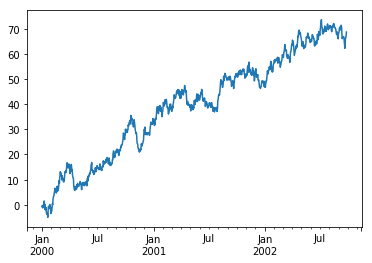

In [7]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [8]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [9]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

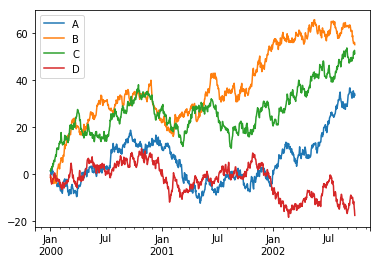

In [10]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [11]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [12]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.261371,-1.362370,1.434779,-0.403317
1,2000-01-02,0.861911,-1.025611,1.187653,-1.965261
2,2000-01-03,0.103986,-1.371888,2.026315,-2.890350
3,2000-01-04,-0.287190,-3.456870,2.537792,-3.421762
4,2000-01-05,1.289863,-2.798477,2.007658,-4.274148
5,2000-01-06,2.174551,-3.082084,3.270160,-3.358897
6,2000-01-07,2.151892,-2.768254,2.556164,-3.630380
7,2000-01-08,0.907278,-3.068590,3.287297,-3.192543
8,2000-01-09,1.207715,-2.501898,3.155646,-2.269386
9,2000-01-10,-0.320222,-2.102964,4.574703,-1.785619


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [13]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [14]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,1.261371,-1.362370,1.434779,-0.403317
2000-01-02,0.861911,-1.025611,1.187653,-1.965261
2000-01-03,0.103986,-1.371888,2.026315,-2.890350
2000-01-04,-0.287190,-3.456870,2.537792,-3.421762
2000-01-05,1.289863,-2.798477,2.007658,-4.274148
2000-01-06,2.174551,-3.082084,3.270160,-3.358897
2000-01-07,2.151892,-2.768254,2.556164,-3.630380
2000-01-08,0.907278,-3.068590,3.287297,-3.192543
2000-01-09,1.207715,-2.501898,3.155646,-2.269386
2000-01-10,-0.320222,-2.102964,4.574703,-1.785619


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

### Gotchas
If you are trying an operation and you see an exception like:

In [ ]:
if pd.Series([False, True, False]):
    print("I was true")

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.